In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Created on 22 May 2019

@author: M Roux
"""

import math
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk

from scipy import ndimage
from scipy import signal

from skimage import io

from skimage import filters


##############################################

import mrlab as mr

##############################################"

In [12]:
############## le close('all') de Matlab
plt.close('all')
################################"


ima=io.imread('images/cell.tif')
sigma=0
seuilnorme=1

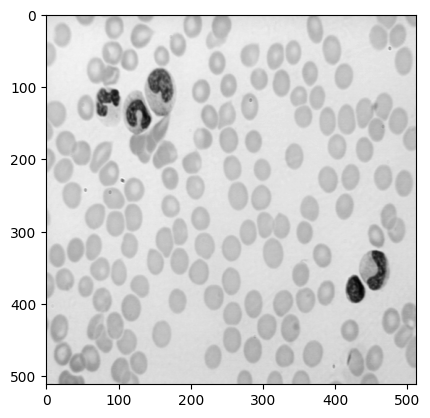

In [13]:
plt.figure('Image originale')
plt.imshow(ima, cmap='gray')

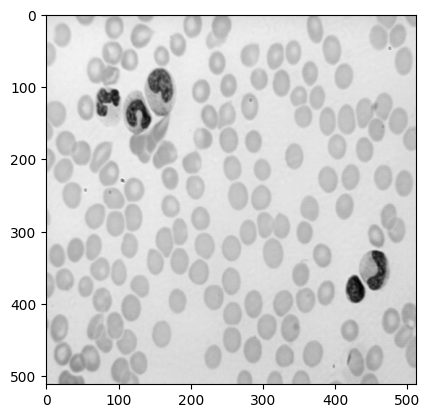

In [14]:
gfima=filters.gaussian(ima,sigma)


plt.figure('Image filtrée (passe-bas)')
plt.imshow(gfima, cmap='gray')

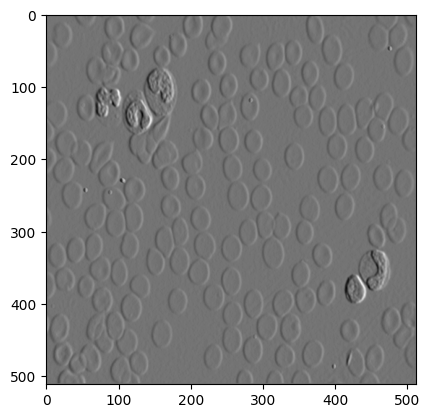

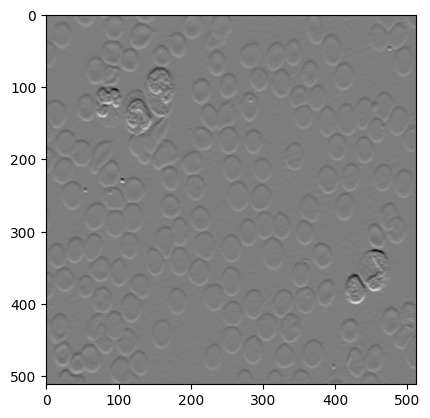

In [15]:
gradx=mr.sobelGradX(gfima)
grady=mr.sobelGradY(gfima)  
      
plt.figure('Gradient horizontal')
plt.imshow(gradx, cmap='gray')

plt.figure('Gradient vertical')
plt.imshow(grady, cmap='gray')

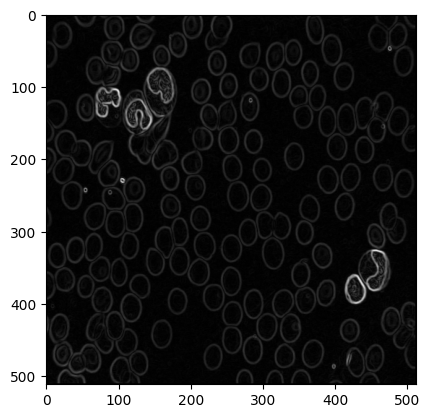

In [16]:
norme=np.sqrt(gradx*gradx+grady*grady)

    
plt.figure('Norme du gradient')
plt.imshow(norme, cmap='gray')

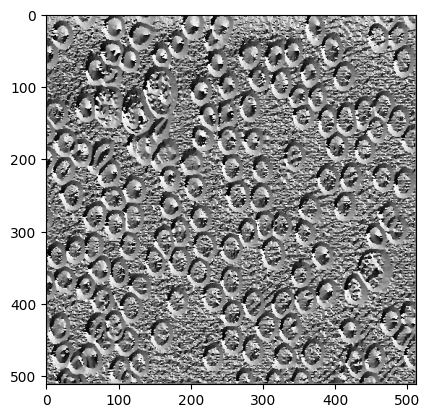

In [17]:
direction=np.arctan2(grady,gradx)
    
plt.figure('Direction du Gradient')
plt.imshow(direction, cmap='gray')

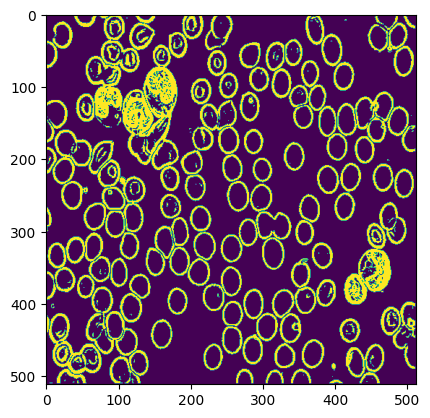

In [18]:
seuilnorme=0.1

contoursnorme =(norme>seuilnorme) 


plt.figure('Norme seuillée')
plt.imshow(255*contoursnorme)

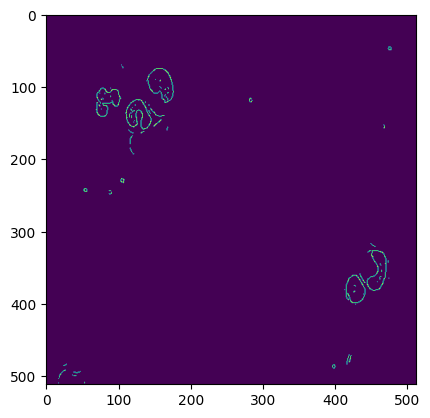

In [19]:
contours=np.uint8(mr.maximaDirectionGradient(gradx,grady))

plt.figure('Maxima du gradient dans la direction du gradient')
plt.imshow(255*contours)

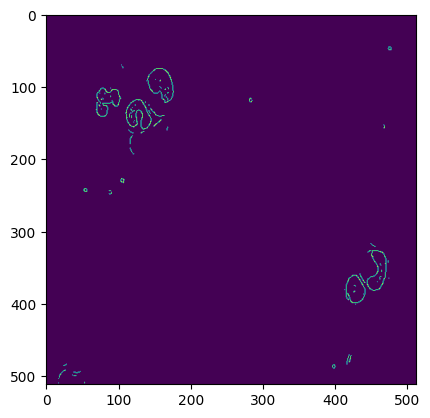

In [20]:
valcontours=(norme>seuilnorme)*contours
      
plt.figure()
plt.imshow(255*valcontours)
plt.show()